In [1]:
import numpy as np
from graspy.simulations import sample_edges
from graspy.plot import heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
import warnings
from simulations_sample_edges_corr import sample_edges_corr

definite simulated P and Rho matrices


In [2]:
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))

tests for properties of sample_corr function



mean of revised probabilities of graph2 is  0.500005303030303


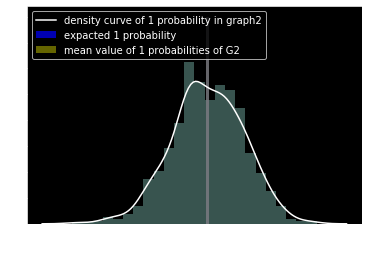

In [3]:
# return prob of G2 without diagnal elements
def test_sample_edges_corr_p(P, Rho, directed=False, loops=False):
    n = np.size(P,1)
    A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
    prob = B.sum()/(n*(n-1))
    return prob

# show the PDF of 1 probability of G2
def density_sample_edges_corr_p(n):
    folder1=[]
    k1=0
    sum1=0
    for i in range (n):
        k1 = test_sample_edges_corr_p(P, Rho, directed=False, loops=False)
        folder1.append(k1)
    folder1.sort()
    m1 = np.mean(folder1)
    print(f'mean of revised probabilities of graph2 is ',m1)

    x1 = p
    sns.distplot(folder1,axlabel='probability values of p', kde_kws={"label":"density curve of 1 probability in graph2","color":"white"})
    plt.bar(x1, 80, width=0.0006, alpha = 0.7, color='blue',label='expacted 1 probability')
    plt.bar(m1, 80, width=0.0006, alpha = 0.4, color='yellow',label='mean value of 1 probabilities of G2')
    plt.legend(loc='upper left')
    plt.show()
density_sample_edges_corr_p(800)

0.29987676767676774


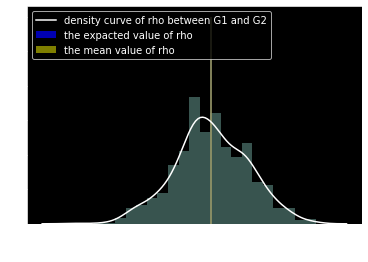

In [5]:
def test_sample_edges_corr_rho(pairs):
    folder2 = []
    h=0
    for i in range (pairs):
        n = np.size(P,1)
        g1, g2 = sample_edges_corr(P, Rho, directed=False, loops=False)
        P0 = np.copy(g1)
        add = g1+g2
        add[add!=2] = 0
        k = (add.sum()/2)/(n*(n-1))
        #k = k/(n*(n-1))
        #print(k)
        r = np.abs((k-p**2)/(p-p**2))
        folder2.append(r)
        h += r
    folder2.sort()
    avr = h/pairs
    print(avr)

    %matplotlib inline
    x2 = rho
    sns.distplot(folder2,axlabel='probability values of p', kde_kws={"label":"density curve of rho between G1 and G2","color":"white"})
    plt.bar(x2, 30, width=0.0015, alpha = 0.7, color='blue',label='the expacted value of rho')
    plt.bar(avr, 30, width=0.0015, alpha = 0.5, color='yellow',label='the mean value of rho')
    plt.legend(loc='upper left')
    plt.show()

test_sample_edges_corr_rho(800)

In [6]:
# calculate the correlations between two graphs
def test_sample_corr_correlation(n):
    As = []
    Bs = []
    for i in range (n):
        A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
        dim = np.size(P,1)
        A = A.flatten()
        As.append(A)
        B = B.flatten()
        Bs.append(B)
    G1 = np.mat(As)
    G2 = np.mat(Bs)
    correlation = np.corrcoef(G1, G2, rowvar=False)
    return correlation
test_sample_corr_correlation(2)

# it will return a 2*dim*dim dimention matrix
# and there are lots of nan in correlation matrix
# I don't see the meaning of doing so

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan,  1., -1., ..., nan,  1., nan],
       [nan, -1.,  1., ..., nan, -1., nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan,  1., -1., ..., nan,  1., nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Expetation of the similarity is 
$p*[p+\rho*(1-p)] + (1-p)*[1-p*(1-\rho)]$.

If we output the simulated results from this function, 

we can see the results is close to what we expect:

In [7]:
# we can check the similarity between graph pairs
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))
def test_sample_edges_corr_same(n):
    S = []
    judge = []
    dim = np.size(P,1)
    for i in range(n):
        A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
        judge = (A == B)+0
        S.append(judge)
    similarity = (np.sum(S)-dim*n)/(n*dim*(dim-1))
    return similarity
result = test_sample_edges_corr_same(1000)
m = p*(p+rho*(1-p)) + (1-p)*(1-p*(1-rho))
print(f'The calculated result of similarity is', result)
print(f'The expected result of similarity is', m)
print(f'The absolute difference is', (abs(result-m)/m)*100,'%')

The calculated result of similarity is 0.6500032323232323
The expected result of similarity is 0.65
The absolute difference is 0.0004972804972759912 %


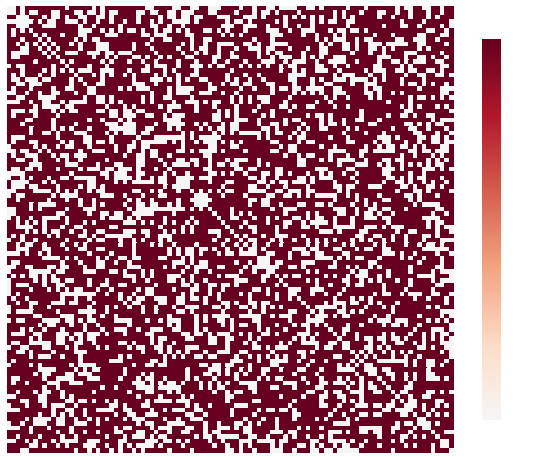

In [2]:
# show positions of the same values in both graphs
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))
def show_sample_edges_corr_same():
    judge = []
    A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
    judge = (A == B)+0
    heatmap(judge - np.diag(np.diag(judge)))
show_sample_edges_corr_same()